# Declaration of Originality

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

![image.png](attachment:image.png)

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Nirup Singh Bajaj
* Tutorial Group                : P05
* Tutor						    :  
* Submission Date               :


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [2]:
## Import libraries
## Import libraries
import pandas  as pd
# pandas is used to load, clean, and work with tabular data.
# It allows us to read the dataset, inspect columns, handle missing values,
# and prepare the data for analysis and modelling.
import numpy as np
# numpy is used for numerical operations.
# It helps with calculations, arrays, and efficient handling of numbers,
# which are required during data processing and model training.
import matplotlib.pyplot  as plt
# matplotlib is used to create basic charts and plots.
# Visualising the data helps us understand patterns, distributions,
# and potential relationships between features and churn.
import seaborn as sns
# seaborn is built on top of matplotlib and is used for clearer,
# more readable statistical visualisations such as bar charts
# and correlation heatmaps
import plotly
#Used for quick, interactive plots (scatter, line, bar)


# **Buisness Understanding**

> Add blockquote



# **2. Data Understanding**

## 2.1 Load dataset

In [3]:
# If your file is bank-full.csv (recommended)
df = pd.read_csv("bank-full.csv", sep=";")

# Quick sanity checks
print(df.shape)
print(df.columns.tolist())
df.head()



(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2.2 Summary Statistics

In [4]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
## Check for missing data
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
## Describe data distribution
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


The dataset contains 45,211 records and 17 columns, with a mix of numerical and categorical variables. There are no missing values, so no data imputation is required before analysis.

The numerical features show a wide range of values. For example, balance includes negative values and large outliers, while duration and campaign are skewed, with most customers having short call durations and few contact attempts. This suggests that scaling may be needed during preprocessing.

The categorical features, such as job, education, contact, and poutcome, have uneven category distributions. Some categories appear much more frequently than others, and several features include an “unknown” category. These variables will need to be encoded before model training.

The target variable y indicates whether a customer subscribed to a term deposit. Most customers did not subscribe, showing class imbalance. Because of this, evaluation metrics such as precision and recall will be more meaningful than accuracy alone.

## 2.3 Data Visualization

### 2.3.1.1 Understanding distribution of target

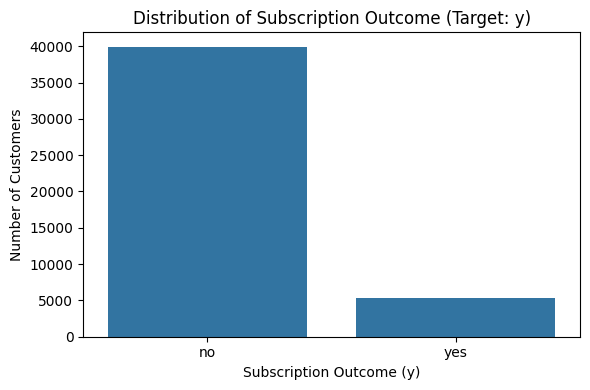

In [7]:
## Understanding distribution of target
TARGET = "y"

plt.figure(figsize=(6,4))
sns.countplot(x=TARGET, data=df)
plt.title("Distribution of Subscription Outcome (Target: y)")
plt.xlabel("Subscription Outcome (y)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


The chart shows that the number of customers who did not subscribe is much higher than those who did subscribe.

### 2.3.1.2 Understanding distribution of features

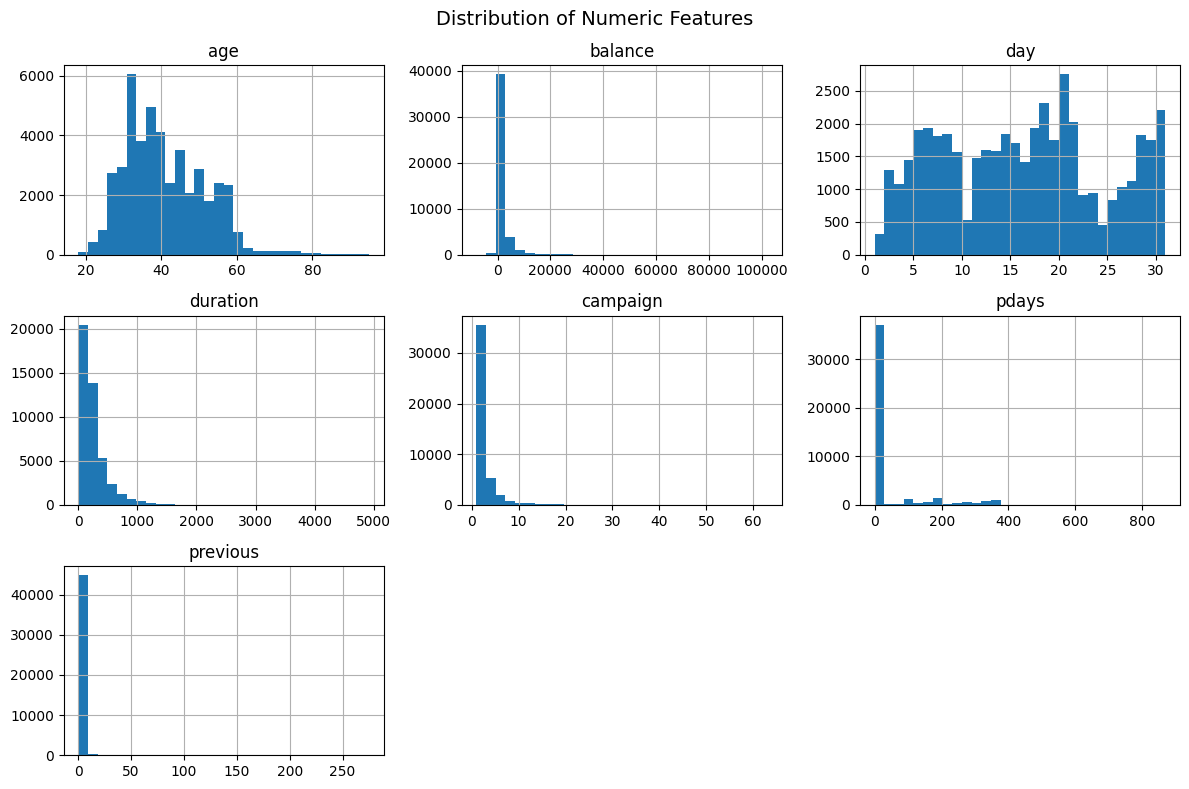

In [8]:
## Understanding distribution of features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


he histograms show that the numerical features have different distribution patterns. The age variable is fairly spread across adult age groups, with most customers between their 30s and 50s.

Several features, such as balance, duration, campaign, pdays, and previous, are highly skewed and contain outliers

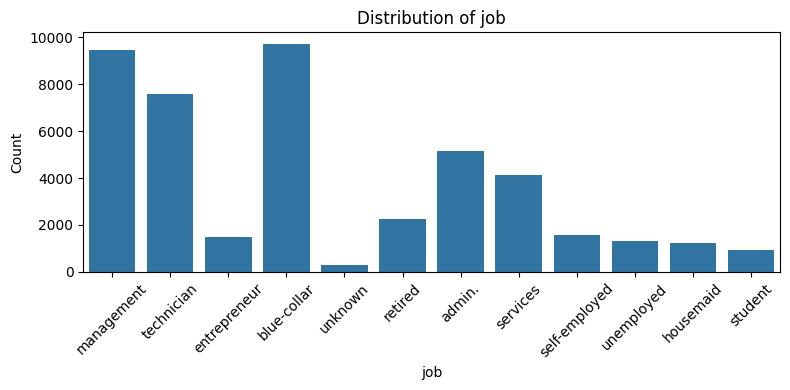

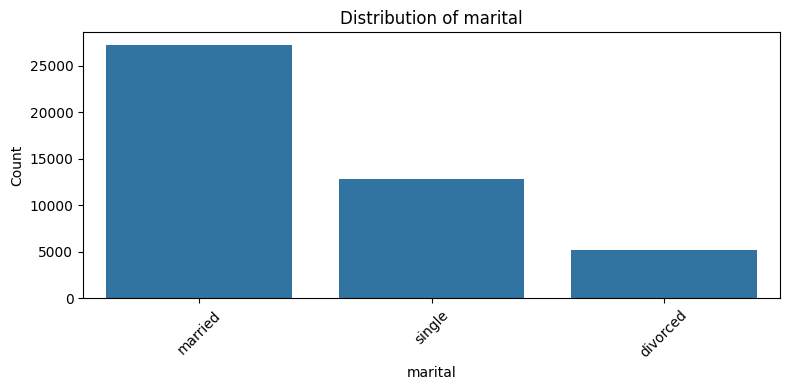

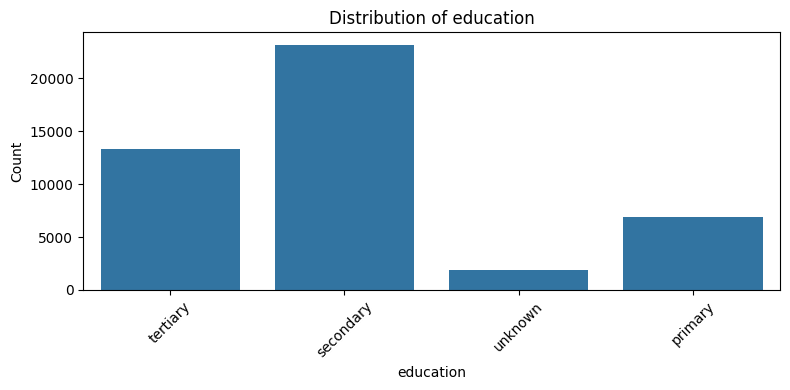

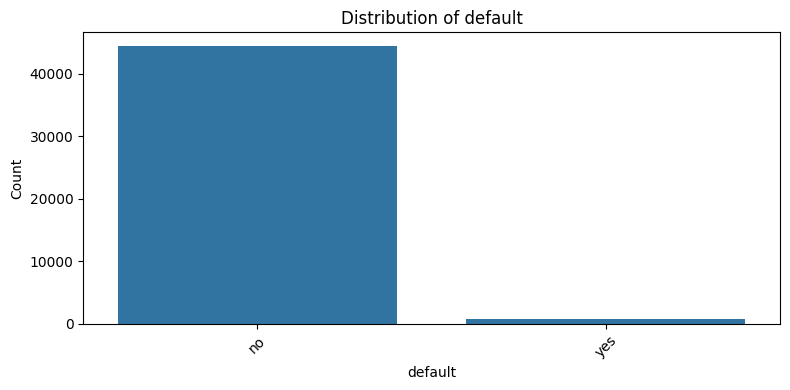

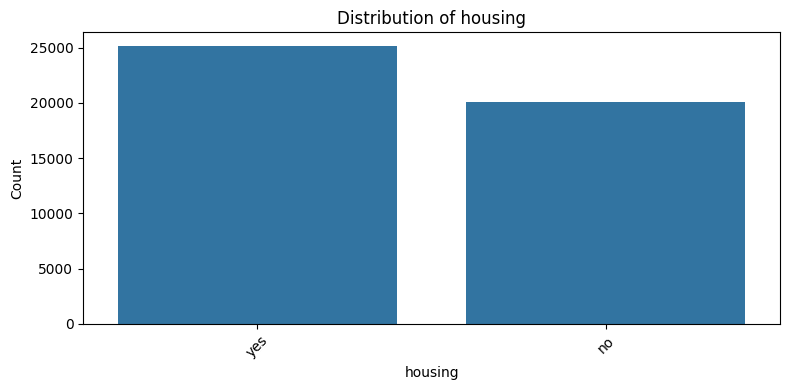

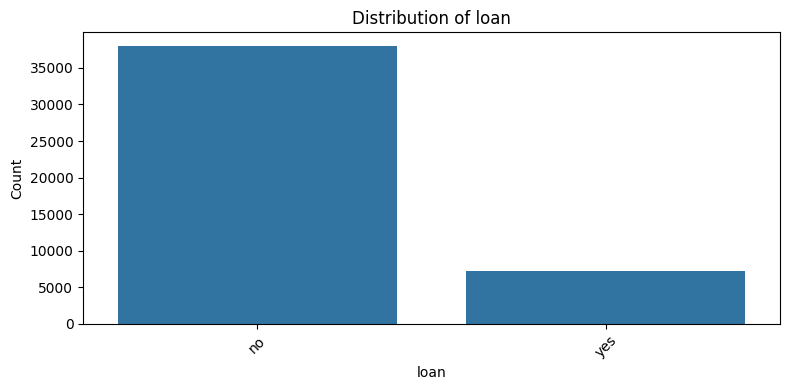

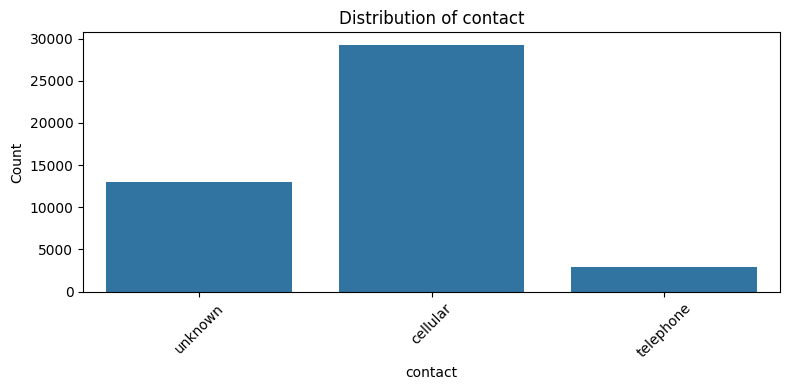

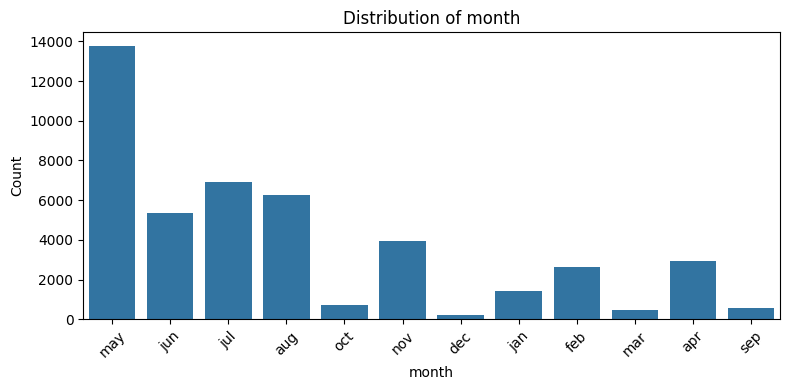

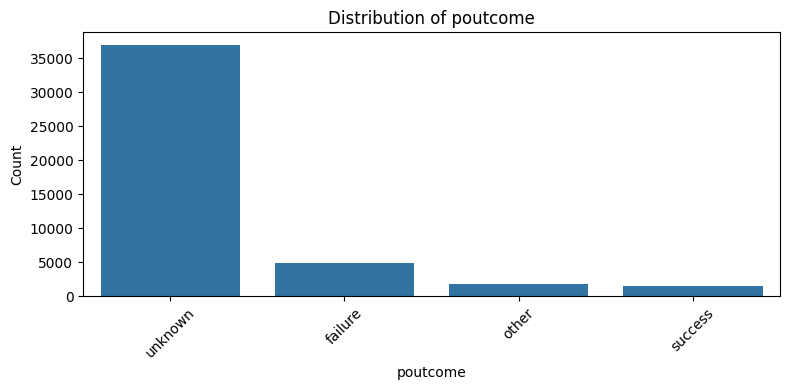

In [9]:
cat_cols = df.select_dtypes(include=["object","category"]).columns.tolist()
cat_cols.remove(TARGET)  # exclude target

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The categorical feature distributions show that the dataset is not evenly spread across categories. For example, certain job types such as blue-collar, management, and technician appear much more frequently than others, while categories like student and housemaid are relatively small.

### 2.3.2 Understanding relationship between variables

<Figure size 800x400 with 0 Axes>

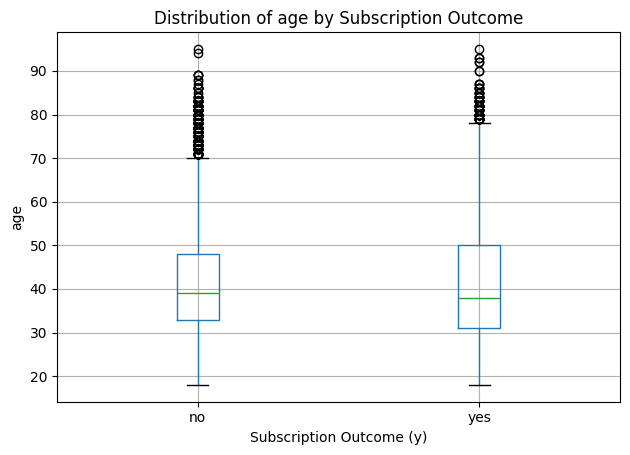

<Figure size 800x400 with 0 Axes>

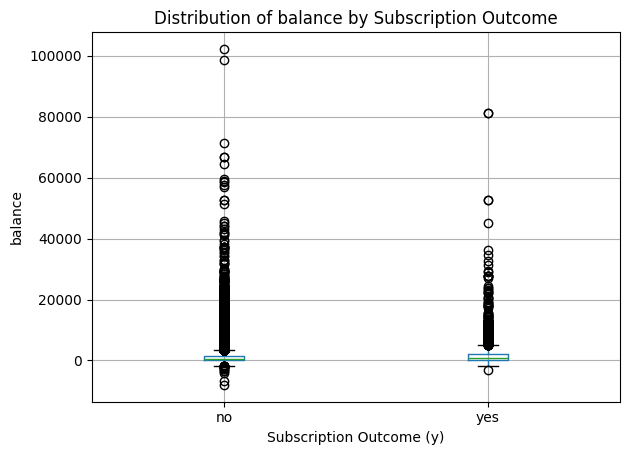

<Figure size 800x400 with 0 Axes>

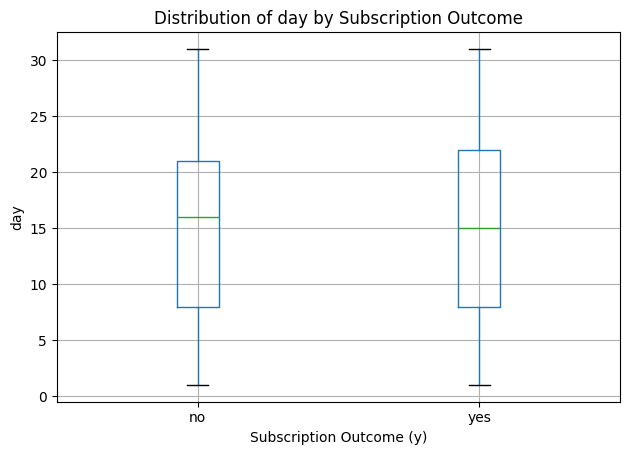

<Figure size 800x400 with 0 Axes>

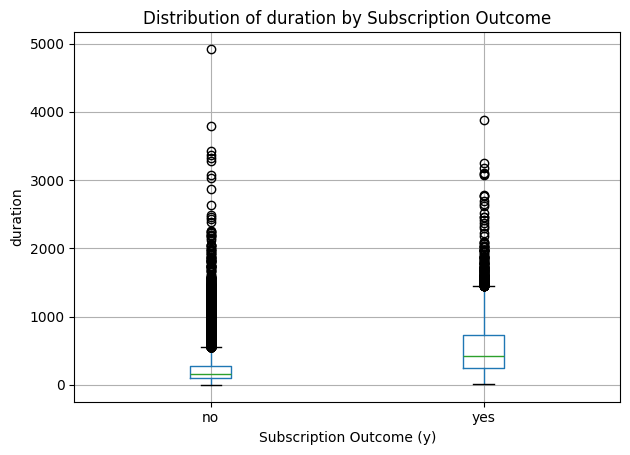

<Figure size 800x400 with 0 Axes>

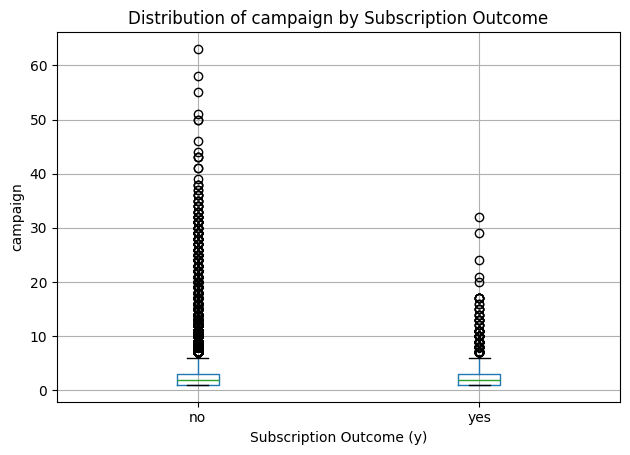

<Figure size 800x400 with 0 Axes>

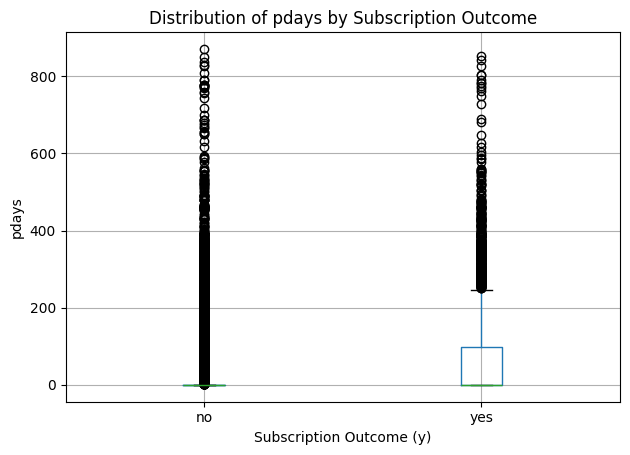

<Figure size 800x400 with 0 Axes>

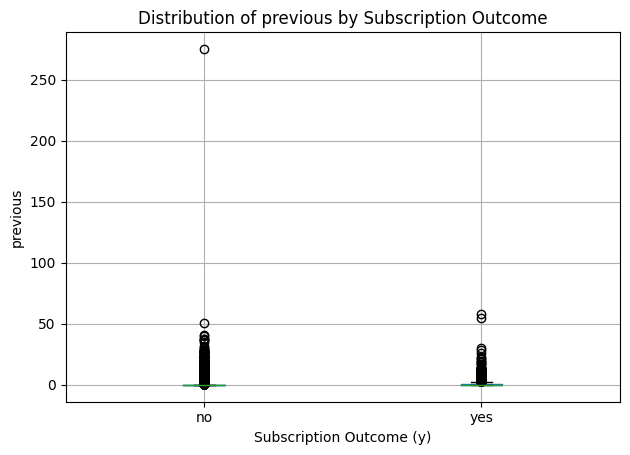

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    df.boxplot(column=col, by=TARGET)
    plt.title(f"Distribution of {col} by Subscription Outcome")
    plt.suptitle("")
    plt.xlabel("Subscription Outcome (y)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


From the boxplots, it is clear that not all numerical features contribute equally to the subscription outcome. Some variables show noticeable differences between customers who subscribed and those who did not, while others appear to have very similar distributions across both groups.

Several features display wide spreads and many extreme values, indicating that the data is not evenly distributed. Additonally, there are also features where repeated values or heavy clustering are observed, which may reduce their predictive power on their own.


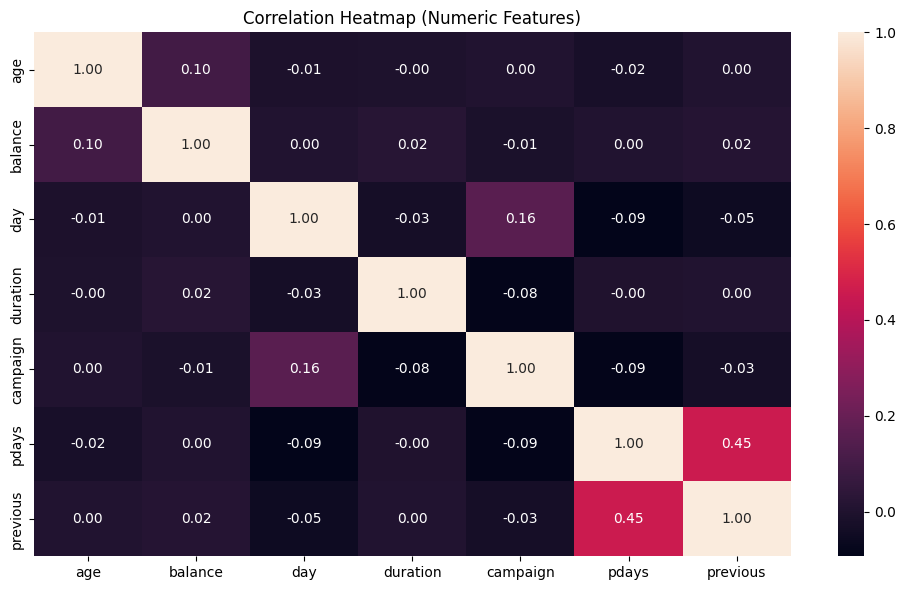

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


The correlation heatmap shows that most numerical features have weak correlations with each other. This suggests that the variables generally capture different aspects of customer behaviour and there is not much redundantcy present.

# ** 3. Data Preparation**

## 3.1 Data Cleaning

In [12]:
import pandas as pd
import numpy as np

TARGET = "y"

X = df.drop(columns=[TARGET]).copy()
y = df[TARGET].copy()


categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


print("\nMissing values in each column:\n", df.isnull().sum())


# For categorical: fill with most common value (mode)
# For numerical: fill with average value (mean)
for col in categorical_cols:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].mode()[0])

for col in numerical_cols:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].mean())

#  One-hot encode categorical features

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Convert target into numeric (0/1)

y_encoded = y.apply(lambda v: 1 if v == "yes" else 0)


#  Combine encoded features + target (final cleaned dataset)

df_cleaned = X_encoded.copy()
df_cleaned[TARGET] = y_encoded

# 8) Verify and save

print("\nShape before encoding:", df.shape)
print("Shape after encoding :", df_cleaned.shape)
print("\nPreview of cleaned data:\n", df_cleaned.head())

df_cleaned.to_csv("bank_cleaned.csv", index=False)
print("\n Cleaned data saved as 'bank_cleaned.csv'")


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Shape before encoding: (45211, 17)
Shape after encoding : (45211, 43)

Preview of cleaned data:
    age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33

In [13]:
# Use the cleaned/encoded dataset (no strings)
X = df_cleaned.drop(columns=["y"])
y = df_cleaned["y"]

print("Any object columns left in X?", X.select_dtypes(include=["object"]).columns.tolist())


Any object columns left in X? []


## 3.2 Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# **4. Modelling**

### 4.1  Base Model

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy : 0.8991485126617274
Precision: 0.6479338842975206
Recall   : 0.3593033913840513

Confusion Matrix:
 [[7739  213]
 [ 699  392]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.36      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043





## *Logistic Regression*

Although the model achieves a high accuracy of around 90%, accuracy is not the best metric in this case because the dataset is imbalanced, with significantly more customers not subscribing than subscribing. In such situations, a model can achieve high accuracy simply by predicting the option 'no' most of the time, while still performing poorly at identifying actual subscribers.

Recall measures the proportion of actual subscribers that are correctly identified by the model. This is especially important for the contex of the bank dataset, where the goal is to identify as many potential subscribers as possible. A low recall value means that many customers who would have subscribed are missed. In the current results, the recall for subscribed customers is relatively low, indicating that this is the main weakness of the model and the area that requires improvement.

Precision may also be useful, but it  focuses on how many predicted subscribers are actually correct, but it does not address the problem of missing a large number of real subscribers. F1-score provides a balance between precision and recall, but it can hide the fact that recall is the primary concern in this business context.


## 4.2 Iterative model development


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("=== Decision Tree Results ===")
print("Accuracy :", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall   :", recall_score(y_test, y_pred_tree))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

new_data = X_test.iloc[[0]]          # one sample as an example
new_pred_class = tree_model.predict(new_data)[0]

print("\n=== New Data Prediction (Decision Tree) ===")
print("Predicted class (0=no, 1=yes):", new_pred_class)

=== Decision Tree Results ===
Accuracy : 0.8705075749198274
Precision: 0.4647887323943662
Recall   : 0.48395967002749773

Confusion Matrix:
 [[7344  608]
 [ 563  528]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7952
           1       0.46      0.48      0.47      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


=== New Data Prediction (Decision Tree) ===
Predicted class (0=no, 1=yes): 0



## ***Descion Tree***
The Decision Tree model shows a lower accuracy (about 87%) compared to Logistic Regression, but it performs better at identifying subscribers, with a higher recall of about 48%.

This means the Decision Tree is able to correctly detect more customers who actually subscribed, even though it makes more incorrect predictions overall. This is reflected in the confusion matrix, where the number of true positives is higher than in the Logistic Regression model.

However, the precision is lower (about 46%), which means that some customers predicted to subscribe did not actually subscribe. This indicates a trade-off where the model prioritises catching more potential subscribers at the cost of more false positives.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


rf_model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    random_state=42,
    class_weight="balanced" # helps with class imbalance
)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest Results ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


new_data = X_test.iloc[[0]]

new_pred_class = rf_model.predict(new_data)[0]
new_pred_prob = rf_model.predict_proba(new_data)[0][1]

print("\n New Data Prediction (Random Forest) ")
print("Predicted class (0=no, 1=yes):", new_pred_class)
print("Probability of subscribing:", round(new_pred_prob, 4))


=== Random Forest Results ===
Accuracy : 0.9031294924250802
Precision: 0.7071290944123314
Recall   : 0.3363886342804766

Confusion Matrix:
 [[7800  152]
 [ 724  367]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.71      0.34      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043


 New Data Prediction (Random Forest) 
Predicted class (0=no, 1=yes): 0
Probability of subscribing: 0.0


## ***Random Forest***

The Random Forest model achieves the highest accuracy about 90.3% among all the models tested. It also has the highest precision about 71%, which means that when the model predicts a customer will subscribe, it is usually correct.

However, the recall is low about 34%, meaning the model misses many customers who actually subscribed. This shows that the Random Forest model is very conservative and it avoids false positives but at the cost of failing to identify many potential subscribers.

From the confusion matrix, we can see that the model correctly predicts most non-subscribers, but only a smaller portion of actual subscribers. This suggests that the model is biased towards the majority class, even though class weighting was applied

## ***Model Selection***

Based on the comparison, the Decision Tree model is selected as the most suitable model for this task.

The main reason for this choice is that recall is prioritised over accuracy in this problem. As the  business goal and understanding is to identify as many potential subscribers as possible. Missing customers who are likely to subscribe is more costly than contacting some customers who may not be interested. The Decision Tree model achieves the highest recall, which means it is better at detecting potential subscribers and aligns well with the business objective.

Logistic Regression performs well as a strong baseline model and provides stable results. Random Forest improves accuracy and precision but does not improve recall, which is the most important metric for this task. Therefore, despite its higher overall accuracy, Random Forest is less suitable for meeting the main objective.

# 5.**Feautre Engineering**

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# -------------------------------
# Train Random Forest for feature importance
# -------------------------------
rf_fs = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_fs.fit(X_train, y_train)

# Create feature importance table

importances = pd.Series(
    rf_fs.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Create DataFrame with cumulative importance

importance_df = importances.reset_index()
importance_df.columns = ["Feature", "Importance"]

# Cumulative sum and percentage
importance_df["Cumulative_Importance"] = importance_df["Importance"].cumsum()
importance_df["Cumulative_Percentage"] = importance_df["Cumulative_Importance"] * 100


# Display top 20 features

top_20 = importance_df.head(20)

print("Top 20 features with cumulative importance:")
print(top_20)

print("\nTotal cumulative importance of top 20 features:",
      round(top_20["Cumulative_Importance"].iloc[-1], 4))

print("Total cumulative percentage:",
      round(top_20["Cumulative_Percentage"].iloc[-1], 2), "%")



Top 20 features with cumulative importance:
                Feature  Importance  Cumulative_Importance  \
0              duration    0.353759               0.353759   
1               balance    0.079923               0.433682   
2                   age    0.077959               0.511641   
3                   day    0.068999               0.580640   
4       contact_unknown    0.036888               0.617528   
5              campaign    0.035549               0.653077   
6      poutcome_success    0.035492               0.688569   
7                 pdays    0.034655               0.723224   
8           housing_yes    0.029164               0.752388   
9              previous    0.020766               0.773154   
10            month_may    0.014393               0.787546   
11     poutcome_unknown    0.011920               0.799467   
12            month_mar    0.011882               0.811348   
13            month_jul    0.011197               0.822546   
14            month_aug   

In [20]:
TOP_N = 20  # you can try 15, 20, 25 and compare recall/F1

selected_features = importances.head(TOP_N).index.tolist()
print(f"\nSelected top {TOP_N} features:")
print(selected_features)

# Reduce train/test sets
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

print("\nOriginal feature count:", X_train.shape[1])
print("Selected feature count:", X_train_sel.shape[1])



Selected top 20 features:
['duration', 'balance', 'age', 'day', 'contact_unknown', 'campaign', 'poutcome_success', 'pdays', 'housing_yes', 'previous', 'month_may', 'poutcome_unknown', 'month_mar', 'month_jul', 'month_aug', 'month_oct', 'loan_yes', 'marital_married', 'month_jun', 'education_secondary']

Original feature count: 42
Selected feature count: 20


Feature selection was done using Random Forest feature importance to find which features were most useful for predicting whether a customer would subscribe.

The top 20 features were chosen because together they make up about 88% of the total feature importance.

Keeping these features helps the model focus on the most important patterns in the data while reducing unnecessary features. This makes the model simpler and helps reduce noise from low mpact features.

Features outside the top 20 had very small importance values and were removed, as they were unlikely to improve the model’s performance.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def eval_model_selected(name, model):
    model.fit(X_train_sel, y_train)
    pred = model.predict(X_test_sel)
    print(f"\n=== {name} (After Feature Selection) ===")
    print("Accuracy :", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall   :", recall_score(y_test, pred))
    print(classification_report(y_test, pred))

# Compare again after feature selection
eval_model_selected("Logistic Regression", LogisticRegression(max_iter=2000, random_state=42))
eval_model_selected("Decision Tree", DecisionTreeClassifier(random_state=42))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression (After Feature Selection) ===
Accuracy : 0.8980426849496849
Precision: 0.6401326699834162
Recall   : 0.3538038496791934
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043


=== Decision Tree (After Feature Selection) ===
Accuracy : 0.8687382505805595
Precision: 0.4590443686006826
Recall   : 0.4931255728689276
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7952
           1       0.46      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.71      0.70      9043
weighted avg       0.87      0.87      0.87      9043



After retraining the models, Logistic Regression showed minimal change in performance, with recall remaining at around 35%. This indicates that feature selection did not significantly benefit the model due to its linear nature.

In contrast, the Decision Tree model showed a improvement where its recall increased from 0.484 to 0.493, and the F1-score improved from 0.47 to 0.48. This  is expected, as the model became more focused on identifying subscribers rather than optimising overall accuracy.

The Decision Tree was selected as the final model because it performed best for the project’s objective. In terms of performance, it achieved the highest recall after feature selection, meaning it identified more customers who actually subscribed. From an interpretability standpoint, the Decision Tree is easy to understand, as its rule-based structure clearly shows how decisions are made. In terms of deployment, it is lightweight, fast to run, and does not require complex preprocessing, making it practical to use in a real business setting.